In [1]:
import matplotlib
import matplotlib.pyplot
import matplotlib.style
import numpy
import sympy
import sympy.printing
import sympy.utilities

matplotlib.rcParams["figure.figsize"] = [12, 6]
matplotlib.style.use("dark_background")
sympy.init_printing(use_latex=True)

We introduce normalised variables to simplify the equations:
- normalised pixel position `p = x / w`
- normalised shear `s = delta * v / w`
- count `c = delta * rho`

In [2]:
# c0 := s < 1

# c, p in ]0, +oo[
c, p = sympy.symbols("c p", real=True, positive=True)

# s in ]0, 1[
s0 = sympy.symbols("s0", real=True, positive=True)
s1 = s0 + 1
s  = 1 / s1

f = sympy.Piecewise(
    (0, p < 0),
    (p * c / s, p < s),
    (c, p < 1),
    (c * (1 - (p - 1) / s), p < 1 + s),
    (0, True),
)

mu_with_assumptions = sympy.integrate((f / (1 + s)).simplify(), (p, 0, 1 + s)).simplify()
variance_with_assumptions = sympy.integrate(
    (((f - mu_with_assumptions) ** 2) / (1 + s)).simplify(), (p, 0, 1 + s)
).simplify()


In [3]:
# re-introduce variables to clear bindings
s0, s1, s = sympy.symbols("s0 s1 s", real=True, positive=True)

mu_c0 = mu_with_assumptions.subs(s0, 1 / s - 1).simplify()
variance_c0 = variance_with_assumptions.subs(s0, 1 / s - 1).simplify().factor()

\frac{c}{s + 1}


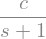

In [4]:
print(sympy.printing.latex(mu_c0))
mu_c0

- \frac{c^{2} s \left(s - 2\right)}{3 \left(s + 1\right)^{2}}


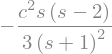

In [5]:
print(sympy.printing.latex(variance_c0))
variance_c0

In [6]:
# c1 := s > 1

# c, p in ]0, +oo[
c, p = sympy.symbols("c p", real=True, positive=True)

# s in ]1, +oo[
s0 = sympy.symbols("s0", real=True, positive=True)
s = s0 + 1

f = sympy.Piecewise(
    (0, p < 0),
    (p * c / s, p < 1),
    (c / s, p < s),
    (c * (1 + s - p) / s, p < 1 + s),
    (0, True),
)

mu_with_assumptions = sympy.integrate((f / (1 + s)).simplify(), (p, 0, 1 + s)).simplify()
variance_with_assumptions = sympy.integrate(
    (((f - mu_with_assumptions) ** 2) / (1 + s)).simplify(), (p, 0, 1 + s)
).simplify()

In [7]:
# re-introduce variables to clear bindings
s0, s = sympy.symbols("s0 s", real=True, positive=True)

mu_c1 = mu_with_assumptions.subs(s0, s - 1).simplify()
variance_c1 = variance_with_assumptions.subs(s0, s - 1).simplify().factor()

\frac{c}{s + 1}


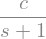

In [8]:
print(sympy.printing.latex(mu_c1))
mu_c1

\frac{c^{2} \cdot \left(2 s - 1\right)}{3 s^{2} \left(s + 1\right)^{2}}


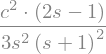

In [9]:
print(sympy.printing.latex(variance_c1))
variance_c1

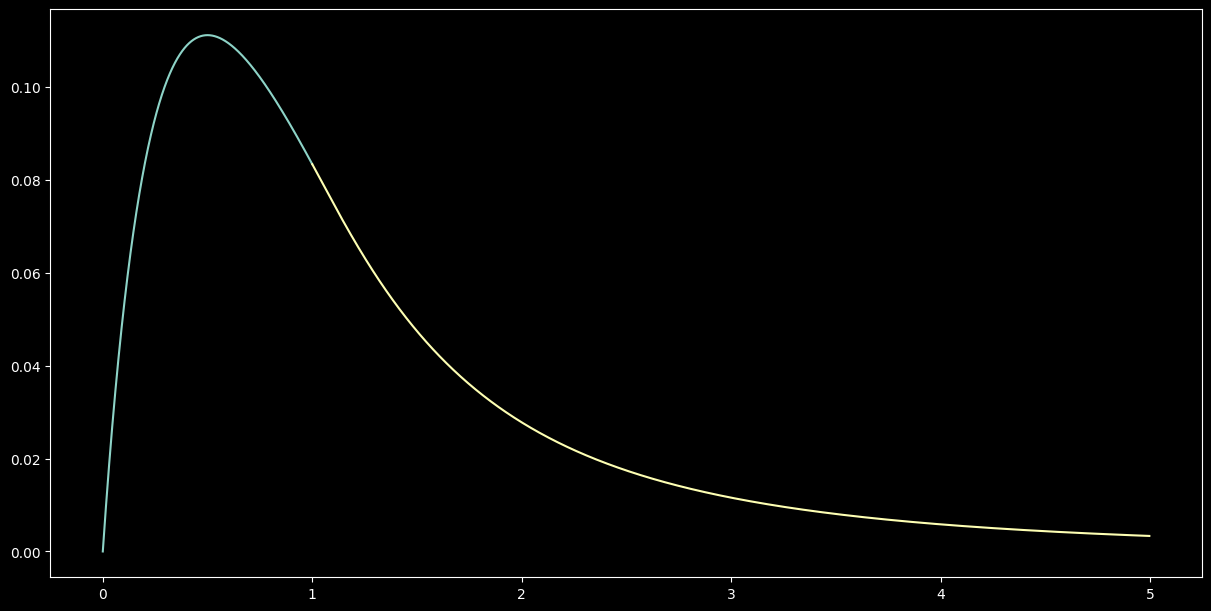

In [10]:
variance_c0_lambda = sympy.utilities.lambdify(s, variance_c0.subs(c, 1.0))
variance_c1_lambda = sympy.utilities.lambdify(s, variance_c1.subs(c, 1.0))

s_grid_c0 = numpy.linspace(0.0, 1.0, 1000, endpoint=False)
s_grid_c1 = numpy.linspace(1.0, 5.0, 1000, endpoint=False)

figure, subplot = matplotlib.pyplot.subplots(layout="constrained")
subplot.plot(
    s_grid_c0,
    numpy.vectorize(variance_c0_lambda)(s_grid_c0),
)
subplot.plot(
    s_grid_c1,
    numpy.vectorize(variance_c1_lambda)(s_grid_c1),
)